In [1]:
import thesis_utils as tu
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = tu.Dataset()
td_df = data.translated_data
sd_df = data.site_data

/Users/mitchellborchers/.virtualenvs/thesis/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/Users/mitchellborchers/.virtualenvs/thesis/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
m_df = pd.merge(td_df[['site_data_id', 'original_language']], sd_df[['id', 'category','origin']], left_on='site_data_id', right_on='id')
original = m_df[m_df['origin']=='original']
additional = m_df[m_df['origin']=='additional']


In [ ]:
# data_df = pd.merge(td_df[['site_data_id', 'original_language']], sd_df[['id', 'category', 'origin']], left_on='site_data_id', right_on='id')
# filtered_df.groupby('category').count()
# original['category'].value_counts()

/var/folders/m6/p9h703_s57j69jpyyp2bqjyw0000gn/T/ipykernel_5221/207158753.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_c = df1_c.append(pd.Series([0], index=[category]))
/var/folders/m6/p9h703_s57j69jpyyp2bqjyw0000gn/T/ipykernel_5221/207158753.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_c = df1_c.append(pd.Series([0], index=[category]))


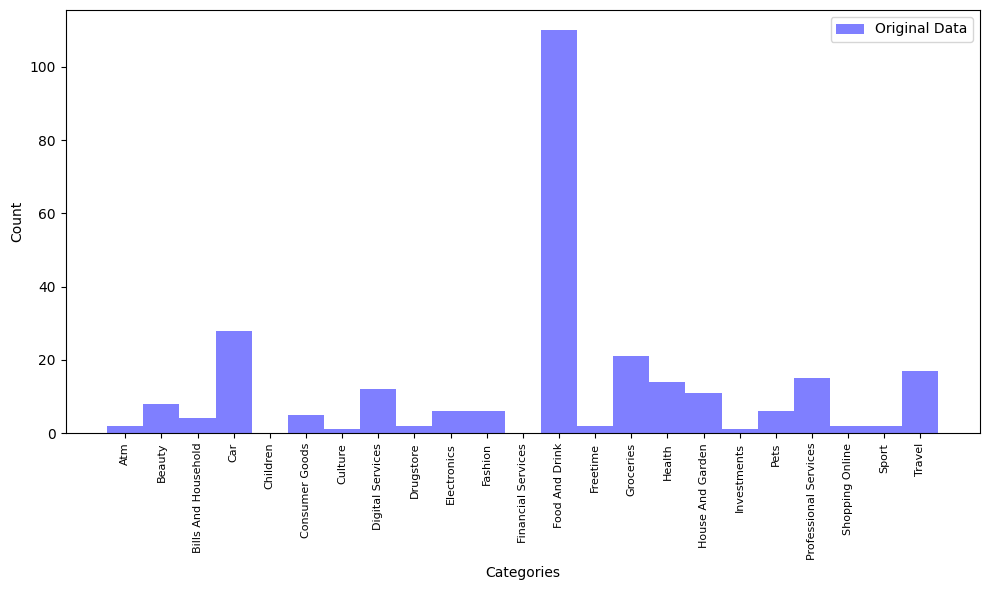

In [11]:
original = m_df[(m_df['origin'] == 'original') & (m_df['original_language'] == 'en')]
categories = m_df['category'].unique()

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 1
opacity = 0.5

df1_c = original['category'].value_counts()
# Add missing categories and fill with zeros
missing_categories = set(categories) - set(df1_c.index)
for category in missing_categories:
    df1_c = df1_c.append(pd.Series([0], index=[category]))
# Sort by category
df1_c = df1_c.sort_index()
category_labels = sorted(categories, key=lambda s: s.split()[0])
ax.bar(df1_c.index, df1_c.values, bar_width, alpha=opacity, color='b', label='Original Data')
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(category_labels, rotation=90, fontsize=8)
ax.legend()
fig.tight_layout()
plt.show()
plt.close(fig)

# df1_c shows counts for the plot sum is 275

In [10]:
# print(df1_c['category'].value_counts())
# print(df1_c['category'].value_counts().sum())
df1_c
df1_c.sum()

275